In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib widget
%matplotlib inline

import sys
sys.executable

&#39;c:\\Data\\Projects\\phd\\cdl\\env\\Scripts\\python.exe&#39;

In [2]:
from dino.environments.playground import PlaygroundEnvironment
from exlab.interface.graph import display
from dino.utils.move import MoveConfig
env = PlaygroundEnvironment()
env.threading = False

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
Loading chipmunk for Windows (64bit) [c:\Data\Projects\phd\cdl\env\lib\site-packages\pymunk\chipmunk.dll]
2020-10-01 11:58:57 RedSky exlogger:c[3500] INFO [modular] Module &#39;PlaygroundEnvironment&#39; has been started


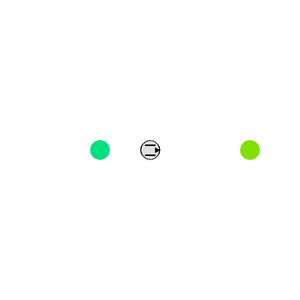

In [3]:
env.displayGui(True)
env.image()

In [4]:
from cdl.agents.learners.curiosity.saggriac import SAGGLearner
learner = SAGGLearner(env.world.findHost())

2020-10-01 11:58:58 RedSky exlogger:c[3500] INFO [modular] Module &#39;ModelDataset&#39; has been started
2020-10-01 11:58:58 RedSky exlogger:c[3500] INFO [modular] Module &#39;ModelDataset&#39; has been started
2020-10-01 11:58:58 RedSky exlogger:c[3500] INFO [modular] Module &#39;Agent&#39; has been started
2020-10-01 11:58:58 RedSky exlogger:c[3500] INFO [modular] Module &#39;Performer&#39; has been started
2020-10-01 11:58:58 RedSky exlogger:c[3500] INFO [modular] Module &#39;planner&#39; has been started
2020-10-01 11:58:58 RedSky exlogger:c[3500] INFO [modular] Module &#39;ModelDataset&#39; has been attached to &#39;Agent&#39;
2020-10-01 11:58:58 RedSky exlogger:c[3500] INFO [modular] Module &#39;InterestModelManager&#39; has been started
2020-10-01 11:58:58 RedSky exlogger:c[3500] INFO [modular] Module &#39;Strategy autonomousStrategy&#39; has been started
2020-10-01 11:58:58 RedSky exlogger:c[3500] INFO [modular] Module &#39;Strategy autonomousStrategy&#39; has been started


In [5]:
from cdl.agents.tools.models.interest_model import InterestModel
# mnc = InterestModel(learner.dataset, learner.propertySpace('Agent.move'), learner.propertySpace('Agent.position'))
# mrp = InterestModel(learner.dataset, learner.propertySpace('Agent.move'), learner.propertySpace('#Cylinder1.positionToAgent'))
# mrp = InterestModel(learner.dataset, learner.propertySpace('Agent.move'), learner.propertySpace('#Cylinder1.positionToAgent'), learner.propertySpace('#Cylinder1.positionToAgent'))
# mo = InterestModel(learner.dataset, learner.propertySpace('Agent.move'), learner.propertySpace('#Cylinder1.position'), learner.propertySpace('#Cylinder1.positionToAgent'))

In [6]:
# mc = InterestModel(learner.dataset, learner.propertySpace('Agent.move'), learner.propertySpace('Agent.position'), learner.propertySpace('Agent.lidar'))
# mrpp = InterestModel(learner.dataset, learner.propertySpace('Agent.position'), learner.propertySpace('#Cylinder1.positionToAgent'), learner.propertySpace('#Cylinder1.positionToAgent'))
# mop = InterestModel(learner.dataset, learner.propertySpace('Agent.position'), learner.propertySpace('#Cylinder1.position'), learner.propertySpace('#Cylinder1.positionToAgent'))

In [7]:
from exlab.modular.logger import Logger, logger, logging
# logger().setRecordLevel(Logger.DEBUG2, 'performer')
# logger().setDisplayLevel(Logger.DEBUG2, 'performer')
# logger().setRecordLevel(logging.DEBUG, 'strategy')
# logger().setDisplayLevel(logging.DEBUG, 'strategy')
# logger().setRecordLevel(Logger.DEBUG2, 'plan')
# logger().setDisplayLevel(Logger.DEBUG2, 'plan')
# logger().display(tag='plan')

In [8]:
competences = {}

In [9]:
for _ in range(5):
    learner.train(20)
    env.run()

    competences[learner.iteration] = learner.dataset.competences(precise=True)

2020-10-01 11:58:59 RedSky exlogger:c[3500] INFO [modular] Module &#39;AdaptiveModelManager&#39; has been started
******************************
--------
ACTIONS: {@☰#17↝🕹&#39;#Agent.move&#39;↕2} []
2020-10-01 11:59:01 RedSky exlogger:c[3500] INFO [adaptation] Adding ModelInterestModel(@☰#17↝🕹&#39;#Agent.move&#39;↕2 | @NullSpace =&gt; @☰#9↝👁&#39;#Agent.position&#39;↕2) (with score 1.019997392256534)
2020-10-01 11:59:01 RedSky exlogger:c[3500] INFO [model] New model added: ModelInterestModel(@☰#17↝🕹&#39;#Agent.move&#39;↕2 | @NullSpace =&gt; @☰#9↝👁&#39;#Agent.position&#39;↕2)
2020-10-01 11:59:01 RedSky exlogger:c[3500] INFO [adaptation] Adding ModelInterestModel(@☰#17↝🕹&#39;#Agent.move&#39;↕2 | @☰#28↝👁&#39;#Agent.lidar&#39;:PRE↕8 =&gt; @☰#13↝👁&#39;#Cylinder1.positionToAgent&#39;↕2) (with score 0.8612915874660171)
2020-10-01 11:59:01 RedSky exlogger:c[3500] INFO [model] New model added: ModelInterestModel(@☰#17↝🕹&#39;#Agent.move&#39;↕2 | @☰#28↝👁&#39;#Agent.lidar&#39;:PRE↕8 =&gt; @☰#13↝👁&#

## Affordances

In [58]:
cyl2 = env.world.cascadingChild('#Cylinder2')
env.world.cascadingChildren()

[Agent:0#Agent bound to root:0,
 Cylinder:0#Cylinder1 bound to root:0,
 Cylinder:1#Cylinder2 bound to root:0]

In [27]:
from cdl.agents.tools.models.affordance import Affordance
aff = Affordance(learner.dataset, learner.propertySpace('Agent.move'), learner.propertySpace('#Cylinder1.position'), learner.propertySpace('#Cylinder1.positionToAgent'), register=False)

hello
hello
hello
hello
hello
hello


In [45]:
aff.abstractOutcomeSpace.abstractedEntities()

{Entity (A)}

In [57]:
aff.abstractOutcomeSpace.abstractedEntityProperties().get(aff.mainEntity())

{Property position}

In [41]:
list(aff.abstractOutcomeSpace.children)[0].element

Property position

In [59]:
aff.compatibleEntity(cyl2)

AttributeError: &#39;Affordance&#39; object has no attribute &#39;compatibleEntity&#39;

## Results

In [ ]:
# %prun -s cumtime learner.train(20)

In [10]:
learner.dataset.invalidateCompetences()
learner.dataset.competences(precise=True)

{ModelInterestModel(@☰#17↝🕹&#39;#Agent.move&#39;↕2 | @NullSpace =&gt; @☰#9↝👁&#39;#Agent.position&#39;↕2): 0.9999666031125396,
 ModelInterestModel(@☰#17↝🕹&#39;#Agent.move&#39;↕2 | @☰#31↝👁&#39;#Cylinder2.position&#39;:PRE↕2 =&gt; @☰#13↝👁&#39;#Cylinder1.positionToAgent&#39;↕2): 0.9781625257848863,
 ModelInterestModel(@☰#9↝👁&#39;#Agent.position&#39;↕2 | @NullSpace =&gt; @☰#13↝👁&#39;#Cylinder1.positionToAgent&#39;↕2): 0.9843602747885332,
 ModelInterestModel(@☰#17↝🕹&#39;#Agent.move&#39;↕2 | @☰#28↝👁&#39;#Agent.lidar&#39;:PRE↕8 =&gt; @☰#12↝👁&#39;#Cylinder1.position&#39;↕2): 0.8827349469043861,
 ModelInterestModel(@☰#9↝👁&#39;#Agent.position&#39;↕2 | @☰#30↝👁&#39;#Cylinder1.positionToAgent&#39;:PRE↕2 =&gt; @☰#15↝👁&#39;#Cylinder2.positionToAgent&#39;↕2): 0.8249101370980685,
 ModelInterestModel(@☰#15↝👁&#39;#Cylinder2.positionToAgent&#39;↕2 | @NullSpace =&gt; @☰#13↝👁&#39;#Cylinder1.positionToAgent&#39;↕2): 0.7692189320473624,
 ModelInterestModel(@☰#17↝🕹&#39;#Agent.move&#39;↕2 | @☰#32↝👁&#39;#Cylinder

In [40]:
learner.dataset.models

[Model(@☰#13↝🕹&#39;#Agent.move&#39;↕2 | @☰#22↝👁&#39;#Agent.lidar&#39;:PRE↕8 =&gt; @☰#11↝👁&#39;#Cylinder1.positionToAgent&#39;↕2),
 Model(@☰#13↝🕹&#39;#Agent.move&#39;↕2 | @NullSpace =&gt; @☰#7↝👁&#39;#Agent.position&#39;↕2),
 ❌Model(@☰#7↝👁&#39;#Agent.position&#39;↕2 | @☰#22↝👁&#39;#Agent.lidar&#39;:PRE↕8 =&gt; @☰#11↝👁&#39;#Cylinder1.positionToAgent&#39;↕2),
 ❌Model(@☰#11↝👁&#39;#Cylinder1.positionToAgent&#39;↕2 | @☰#22↝👁&#39;#Agent.lidar&#39;:PRE↕8 =&gt; @☰#10↝👁&#39;#Cylinder1.position&#39;↕2),
 Model(@☰#7↝👁&#39;#Agent.position&#39;↕2 | @☰#24↝👁&#39;#Cylinder1.positionToAgent&#39;:PRE↕2 =&gt; @☰#10↝👁&#39;#Cylinder1.position&#39;↕2),
 ❌Model(@☰#11↝👁&#39;#Cylinder1.positionToAgent&#39;↕2 | @☰#23↝👁&#39;#Cylinder1.position&#39;:PRE↕2 =&gt; @☰#10↝👁&#39;#Cylinder1.position&#39;↕2),
 Model(@☰#13↝🕹&#39;#Agent.move&#39;↕2 | @☰#22↝👁&#39;#Agent.lidar&#39;:PRE↕8 =&gt; @☰#10↝👁&#39;#Cylinder1.position&#39;↕2),
 Model(@☰#7↝👁&#39;#Agent.position&#39;↕2 | @☰#24↝👁&#39;#Cylinder1.positionToAgent&#39;:PRE↕2 =&

In [ ]:
mrpp.contextSpacialization[0].allTrue()

In [ ]:
learner.dataset.models[1].invalidateCompetences()
learner.dataset.models[1].competence(precise=True)

In [ ]:
learner.adaptiveModelManager.evaluateModels(None)

In [ ]:
[model.lowCompetenceSince for model in learner.dataset.enabledModels()]

In [ ]:
competences

In [ ]:
[config.model for config in learner.configHistory]

In [ ]:
# learner.interestModel.sampleBestPoint()

In [ ]:
from exlab.modular.logger import Logger, logger, logging
# logger().setRecordLevel(Logger.DEBUG2, 'performer')
# logger().setDisplayLevel(Logger.DEBUG2, 'performer')
# logger().setRecordLevel(Logger.DEBUG2, 'strategy')
# logger().setDisplayLevel(Logger.DEBUG2, 'strategy')
logger().setRecordLevel(Logger.DEBUG2, 'plan')
logger().setDisplayLevel(Logger.DEBUG2, 'plan')
# logger().setRecordLevel(logging.DEBUG, 'plan')
# logger().setDisplayLevel(logging.DEBUG, 'plan')
# logger().display(tag='plan')

In [ ]:
learner.dataset.competences(precise=True)

In [ ]:
learner.dataset.competences(precise=True)

In [ ]:
# mrpp.contextSpacialization[0].allTrue()

In [ ]:
# mrp.contextSpacialization[1]._resetAreas()

In [ ]:
[area.columns for area in learner.dataset.models[1].contextSpacialization[0].areas]

In [ ]:
display(learner.dataset.models[1].contextSpacialization[0].visualizeAreas())

In [ ]:
display(learner.dataset.models[2].contextSpacialization[0].visualizeAreas())

In [ ]:
# mrp.eventForwardError(467)

In [ ]:
# eventId = 85
# action = mrp.actionSpace.getPoint(eventId)[0]
# outcome = mrp.outcomeSpace.getPoint(eventId)[0]
# context = mrp.contextSpace.getPoint(eventId)[0]
# print(action)
# mrp.inverse(outcome, context=context)

## Planning

In [ ]:
goal = learner.propertySpace('#Cylinder1.positionToAgent').point([50, 0]).setRelative(False)
learner.planner.planDistance(goal)

In [ ]:
mrpp.inverse(learner.propertySpace('#Cylinder1.positionToAgent').goal([-10.882,  11.432]), context=env.state().context())

In [ ]:
mrpp.forward(learner.propertySpace('Agent.position').action([10.960, -10.059]), context=env.state().context())

In [ ]:
mrp.inverse(learner.propertySpace('#Cylinder1.positionToAgent').action([3, 0]), context=context)

In [ ]:
mrp.inverse(learner.propertySpace('#Cylinder1.positionToAgent').action([3, 0]), context=env.state().context())

In [ ]:
learner.reach(learner.propertySpace('Agent.position').point([50, 0]).setRelative(True))
env.run()

In [ ]:
config = MoveConfig(goal=learner.propertySpace('#Cylinder1.positionToAgent').point([-60, 0]).setRelative(False))
config.plannerSettings.dontMoveSpaces.append(learner.propertySpace('#Cylinder1.position'))
learner.reach(config)
env.run()

In [ ]:
env.world.observe()

In [ ]:
learner.reach(learner.propertySpace('#Cylinder1.position').point([50, 0]).setRelative(True))
env.run()

In [ ]:
mrpp.forward(learner.propertySpace('Agent.position').action([22.107, -2.817]), context=env.state().context())

In [ ]:
mrpp.inverse(learner.propertySpace('#Cylinder1.positionToAgent').action([-12.170,  0.149]), context=env.state().context())

In [ ]:
learner.propertySpace('Agent.move').convertTo(spaceManager=learner.dataset)

In [ ]:
learner.reach(learner.propertySpace('#Cylinder1.position').point([0, -10]).setRelative(True))
env.run()

In [ ]:
learner.propertySpace('Agent.position').point([0, 0])

In [ ]:
learner.dataset.spaces

In [ ]:
learner.dataset.spaces[7].maxDistancePerColumn

In [ ]:
learner.propertySpace('Agent.move').maxDistancePerColumn

In [ ]:
display(learner.propertySpace('Agent.move').visualizeData(), learner.propertySpace('Agent.position').visualizeData())

In [ ]:
display(learner.propertySpace('Agent.move').visualizeData(), learner.propertySpace('#Cylinder1.positionToAgent').visualizeData())

In [ ]:
from dino.data.space import SpaceKind
display(learner.propertySpace('#Cylinder1.positionToAgent', kind=SpaceKind.PRE).visualizeData(), learner.propertySpace('#Cylinder1.position').visualizeData())

In [ ]:
im = list(learner.dataset.models[0].interestMaps.values())[0]
display(im.visualizeData())

In [ ]:
im